In [1]:
import datetime
import numpy as np
import pandas as pd 
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import yfinance as fyf
%matplotlib inline

C:\Nijat\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
fyf.pdr_override()

In [45]:
assets = ['PG', 'AAPL', 'MSFT']
pf_data = pd.DataFrame()
start = datetime.datetime(2017, 1, 1)
end = datetime.datetime(2021, 12, 31)

pf_data = pdr.get_data_yahoo(assets, start = start, end = end)['Adj Close']
pf_data

[*********************100%***********************]  3 of 3 completed


,AAPL,MSFT,PG
Date,,,
2017-01-03,27.332472,58.185524,73.023415
2017-01-04,27.301878,57.925179,73.283592
2017-01-05,27.440716,57.925179,73.769234
2017-01-06,27.746637,58.427254,73.743240
2017-01-09,28.000778,58.241310,73.196854
...,...,...,...
2021-12-23,176.279999,334.690002,160.100006
2021-12-27,180.330002,342.450012,161.970001
2021-12-28,179.289993,341.250000,162.839996


In [46]:
def portfolio_annualized_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns * weights) * 250
    std = np.sqrt(np.dot(weights.T, np.dot(weights, cov_matrix))) * np.sqrt(250)
    return std, returns
    

In [47]:
def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((3,num_portfolios))
    weights_record = []
    for x in range(num_portfolios):
        weights = np.random.random(len(assets))
        weights /= np.sum(weights)
        weights_record.append(weights)
        port_std, port_return = portfolio_annualized_performance(weights, mean_returns, cov_matrix)
        results[0, x] = port_std
        results[1, x] = port_return
        results[2, x] = (port_return - risk_free_rate) / port_std
    return results, weights_record

In [48]:
returns = pf_data.pct_change()
mean_returns = returns.mean()
cov_matrix = returns.cov()
risk_free_rate = 0.01
num_portfolios = 10000

In [49]:
np.random.seed(0)
def optimal_portfolio_weight():
    results, weights = random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0, max_sharpe_idx], results[1, max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=pf_data.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualized Return:", round(rp,4))
    print ("Annualized Volatility:", round(sdp,4))
    print ("\n")
    print (str(max_sharpe_allocation) + ' %')
    print ("-"*80)

    plt.figure(figsize = (10,6))
    plt.xlabel('Annualized Volatility')
    plt.ylabel('Annualized Return')
    plt.scatter(results[0,:], results[1,:])

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualized Return: 0.3649
Annualized Volatility: 0.2403


             AAPL   MSFT     PG
allocation  37.48  45.71  16.81 %
--------------------------------------------------------------------------------


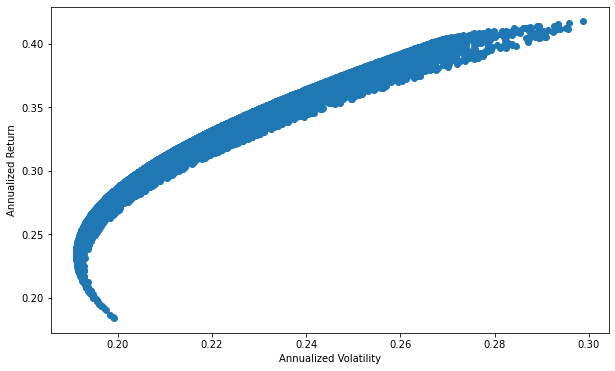

In [50]:
optimal_portfolio_weight()

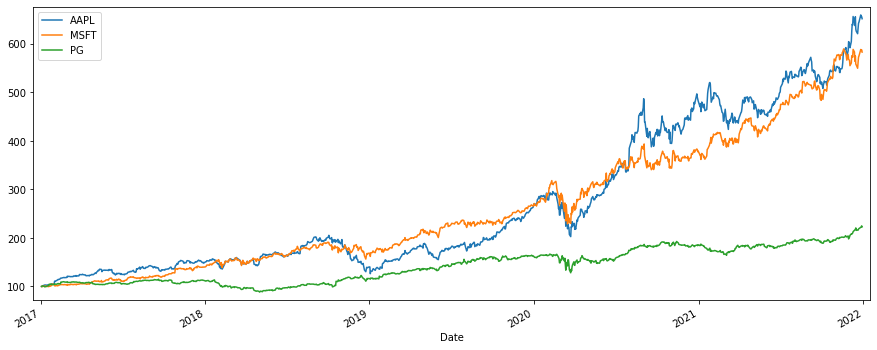

In [51]:
(pf_data / pf_data.iloc[0] *100).plot(figsize = (15,6))
plt.margins(0.01, 0.03)
plt.show()